<span style="color:#929591">Chapter 2.
# <span style="color:#820747">Flight Delays Prediction 2018. Classification Problem.

<img src="img/pl3.jpg">

<span style="color:#610023">In this part of my project, I will build useful model for the Air Traffic Controllers in USA which they can use to predict event such as delay on departure. And this information they can pass to the airport of destination. This information can help organize ground services in airport in more efficient way, and could save a lot of money, on this. Flight delays often cause missed connections, travelers frustration etc. Also if Air Traffic Controllers will have information about upcoming delays, they can to inform passengers on boarding stage, through airlines representatives, or with captain announcement. So pasangers can arrange business on arrival at the destination airport. In this case I have to less make mistakes on wrong predicted cases when delays not going to happen. If we will tell customer flight will be delayed and it will not happen, customer will be very upset. Also in this part I will find the best predictors for the flight delays prediction, which must to be in our model to do more accurate prediction. I will do grid search to find better parameters for my model, but as dataset is very big it is time expensive. And not all models I can run without crashing my computer. Could be a good idea to use AWS in a future.  

# <span style="color:#a83c09">Navigator:

<b>[Dictionary](img/dictionary.txt)

<b>[1. EDA](./Chapter-1-EDA.ipynb)

<b>[3. Length of Delay. Prediction | Regression problem](./Chapter-3-regression_problem.ipynb)

<b>[4. Length Interval of Delay. Prediction | MultiClass Classification problem](./Chapter-4-classification_problem_timeinterval.ipynb)

<img src="img/lin.jpg">

# <span style="color:#a83c09">Chapter Structure:

A. <b>Null Values Dropping and Features Selection</b><br>
         
B. <b>Tuning of Target and Predictors</b><br>
           1. Target: Delay or Not Delay 1 | 0
           2. Predictor: Day of the Week.
           3. Predictor: Airline Code.
           4. Predictor: Tail Number.
           5. Predictor: Flight Number.
           6. Predictor: Origin Airport.
           7. Predictor: State Origin.
           8. Predictor: State Destination.
           9. Predictor: Departure Time.
           10. Predictor: Arrival Time.
           11. Predictor: Scheduled Length of Flight Time.
           12. Predictor: Distance of the Flight.
           
C. <b>Categorical Variables into Dummies.</b><br>
D. <b>Check for Multicollinearity.</b><br>
E. <b>Models Building.</b><br>
         1. Separation: Features and Target Splitting.
         
         2. Standardization: All data into same scale.
         
         3. Split: Train | Test.
         
         4. Model: LogisticRegression.
            - GridSearch for LogisticRegression.
            - Fit Best Parameters into my Model.
            - Confusion Matrix and Classification Report for LR Model.
            - ROC AUC Curve For Binary Classification.
            - Features Importance.
            
         5. Model: DecisionTreeClassifier.
            - GridSearch for LogisticRegression.
            - Fit Best Parameters into my Model.
            - Confusion Matrix and Classification Report for DT Model.
            - ROC AUC Curve For DecisionTreeClassifier.
            - Features Importance for DT model.
            - Tree Visualisation for DT model.
            
         6. Model: RandomForestClassifier.
            - GridSearch for RandomForestClassifier.
            - Fit Best Parameters into my RF Model.
            - Confusion Matrix and Classification Report for RF Model.
            - ROC AUC Curve For RandomForestClassifier.
            - Features Importance for RF model.
            
         7. Model: Sapport Vector Machine and k-Nearest Neighbor.
         
         8. PCA: Dimension reductions (Principal Component Analysis).
            - Fit LogisticRegression with my new dimensionality.
            - Confusion Matrix for LR Model with new dimensionality.
            
         9. Conclusion.

<img src="img/lin.jpg">

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f"> Loading libraries which I will use during second part of the project. I will use sklearn library as it provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python. And it is very easy to use this library.

In [1]:
import pandas as pd
import numpy as np
from numpy import *
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.decomposition import PCA

import itertools

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import datetime, warnings, scipy

# <span style="color:#040273">Part A. Null Values Dropping and Features Selection

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f"> I am predicting flight delays on arrival. Also I want to know about possible delays before plane start moving from the gate in departure airport. In this case I can use only information which not related to how long plane was moving to runway or how long plane was in the air, etc. I will use only information which is static and given before the flight, such as: distance, flight number, state of departure, state of arrival, name of the airport etc. All other features I will drop from my dataframe.

In [2]:
# Load my dataset and check shape with columns name. 
# ________________________________________________________
df = pd.read_csv('1_full_file_ready_to_slice.csv', low_memory=False)
print('Number of records and columns: ',df.shape)
print('----------------------------------------------------------')
print('Columns: ',df.columns)

Number of records and columns:  (570007, 45)
----------------------------------------------------------
Columns:  Index(['Unnamed: 0', 'ID', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK',
       'AIRLINE_CODE', 'AIRLINE', 'TAIL_NUMBER', 'FLIGHT_NUMBER', 'DATE',
       'ORIGIN_AIRPORT', 'AIRPORT_ORIGIN', 'CITY_ORIGIN', 'STATE_ORIGIN',
       'LATITUDE_ORIGIN', 'LONGITUDE_ORIGIN', 'DESTINATION_AIRPORT',
       'AIRPORT_DESTINATION', 'CITY_DESTINATION', 'STATE_DESTINATION',
       'LATITUDE_DESTINATION', 'LONGITUDE_DESTINATION', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'CANCELLED', 'CANCELLATION_REASON', 'DIVERTED',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'AIRLINE_DELAY', 'WEATHER_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY'],
      dtype='object')


In [3]:
# Dropping unneeded columns and check for null values
# ________________________________________________________
df.drop(['Unnamed: 0', 'ID', 'YEAR', 'MONTH', 'DAY', 'AIRLINE', 'CANCELLATION_REASON', 
         'DATE', 'AIRPORT_ORIGIN', 'LATITUDE_ORIGIN', 'LONGITUDE_ORIGIN', 'AIRPORT_DESTINATION',
         'LATITUDE_DESTINATION', 'LONGITUDE_DESTINATION', 'CITY_DESTINATION', 'DEPARTURE_TIME',
         'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME', 'CANCELLED', 'CANCELLATION_REASON', 
         'DIVERTED', 'ELAPSED_TIME', 'AIR_TIME'], axis=1, inplace=True)

df.isnull().sum()

DAY_OF_WEEK                 0
AIRLINE_CODE                0
TAIL_NUMBER              1969
FLIGHT_NUMBER               0
ORIGIN_AIRPORT              0
CITY_ORIGIN                 0
STATE_ORIGIN                0
DESTINATION_AIRPORT         0
STATE_DESTINATION           0
SCHEDULED_DEPARTURE         0
DEPARTURE_DELAY         17332
TAXI_OUT                17072
SCHEDULED_ARRIVAL           0
ARRIVAL_DELAY           18626
SCHEDULED_TIME              0
DISTANCE                    0
AIRLINE_DELAY          472257
WEATHER_DELAY          472257
AIR_SYSTEM_DELAY       472257
SECURITY_DELAY         472257
LATE_AIRCRAFT_DELAY    472257
dtype: int64

In [6]:
# Fill all NaN's in features related to delays with '0'. Drop all nulls.
# ________________________________________________________
where_are_NaNs = isnan(df.AIRLINE_DELAY)
df.AIRLINE_DELAY[where_are_NaNs] = 0

where_are_NaNs = isnan(df.WEATHER_DELAY)
df.WEATHER_DELAY[where_are_NaNs] = 0

where_are_NaNs = isnan(df.AIR_SYSTEM_DELAY)
df.AIR_SYSTEM_DELAY[where_are_NaNs] = 0

where_are_NaNs = isnan(df.SECURITY_DELAY)
df.SECURITY_DELAY[where_are_NaNs] = 0

where_are_NaNs = isnan(df.LATE_AIRCRAFT_DELAY)
df.LATE_AIRCRAFT_DELAY[where_are_NaNs] = 0


df = df.dropna()
print('---------------------------------------------------')
print('Number of records after NaNs droping: ',df.shape)
print('---------------------------------------------------')

---------------------------------------------------
Number of records after NaNs droping:  (550905, 21)
---------------------------------------------------


<img src="img/lin.jpg">

# <span style="color:#040273">Part B. Tuning of Target and Predictors

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f"> In this part I will 1st set my Target variable as (1/0). 1 - represents delay and 0 - represents no delay on arrival. I will count delay if it's more than 1 minute. 2nd I will create catigorical variables which was related to number of given delays, for example group of airports which has less delays in records, another group with higher number of delays etc. And final step in Part B will be, making dummy variables from categorical variables, which I will use in my models to train and then predict my target.

# <span style="color:#ffad01">1. Target: <span style="color:#004577">Delay or Not Delay 1 | 0

<img src="img/man2.jpg">

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f"> Mean of delays on arrival airports is 2.8 min. I dont want loose too many values which represents delays, that why I will select delays if they longer than <b>1 min</b>. If delay was less than minute, I will not count this as a delay. I got <b>179305 delays</b> on arrival which seems as a good proportion to events like no delay which is 371600.

In [8]:
#Count delay from 1 min and above. Mean for arrival_delay is 2.8 min. 
df['Arrival_delay_b'] = 0
df.ix[(df['ARRIVAL_DELAY'] >= 1, 'Arrival_delay_b')] = 1

# Proportion is good. 
# ________________________________________________________
print('------------------------')
print('My target values proportion:')
print(df.Arrival_delay_b.value_counts())
print('------------------------')

------------------------
My target values proportion:
0    371600
1    179305
Name: Arrival_delay_b, dtype: int64
------------------------


In [9]:
# Check what columns I have at this stage, I will drop all unneded columns later. 
# ________________________________________________________
df.columns

Index(['DAY_OF_WEEK', 'AIRLINE_CODE', 'TAIL_NUMBER', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'CITY_ORIGIN', 'STATE_ORIGIN', 'DESTINATION_AIRPORT',
       'STATE_DESTINATION', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'TAXI_OUT', 'SCHEDULED_ARRIVAL', 'ARRIVAL_DELAY', 'SCHEDULED_TIME',
       'DISTANCE', 'AIRLINE_DELAY', 'WEATHER_DELAY', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Arrival_delay_b'],
      dtype='object')

<img src="img/lin.jpg">

# <span style="color:#ffad01">2. Predictor: <span style="color:#004577">Day of the Week.

In [10]:
# Using 'DAY_OF_WEEK' column as 7 categories to make dummies later. 
# ________________________________________________________
df.DAY_OF_WEEK.unique()

array([1, 2, 3, 4, 5, 6, 7])

<img src="img/lin.jpg">

# <span style="color:#ffad01">3. Predictor: <span style="color:#004577">Airline Code.

In [11]:
# Using 'AIRLINE_CODE' column as 18 categories to make dummies later.
# ________________________________________________________
df.AIRLINE_CODE.unique()

array(['EV', 'DL', 'F9', 'YV', 'OH', 'MQ', 'UA', 'OO', 'NK', 'B6', 'WN',
       'VX', 'AA', 'G4', 'HA', 'YX', '9E', 'AS'], dtype=object)

<img src="img/lin.jpg">

# <span style="color:#ffad01">4. Predictor: <span style="color:#004577">Tail Number.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f"> I splitted airplanes on two groups using their tail number. One group will be planes which was flying more than 165 times and another group was flying less. Number of planes which more often flying is 95814 and planes which has less flights is 455091. I will create new column for this categorical information "more_less_flights_tail".

In [12]:
df['test_for_tail'] = 0
df['test_for_tail'] = df.groupby('TAIL_NUMBER')['TAIL_NUMBER'].transform('count')
df['more_less_flights_tail'] = 0
df.ix[(df.test_for_tail > 165, 'more_less_flights_tail')] = 1
df.drop('test_for_tail', axis=1, inplace=True)

print('------------------------------------------')
print(df.more_less_flights_tail.value_counts())
print('------------------------------------------')

------------------------------------------
0    455091
1     95814
Name: more_less_flights_tail, dtype: int64
------------------------------------------


<img src="img/lin.jpg">

# <span style="color:#ffad01">5. Predictor: <span style="color:#004577">Flight Number.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f"> I will create 5 groups of flight numbers. Each group has different number of delays on arrivals. And I will create new column "delays_by_flight_number" where those categories will be representing each flight.

In [13]:
df['delays_by_flight_number'] = 0
df['delays_by_flight_number'] = df.groupby(['FLIGHT_NUMBER', 'Arrival_delay_b'])['Arrival_delay_b'].transform('count')

df['delays_by_flight_number'] =  df['delays_by_flight_number'].apply(lambda x: 1 if x >= 0 and x < 60 else int(x))
df['delays_by_flight_number'] =  df['delays_by_flight_number'].apply(lambda x: 2 if x >= 60 and x < 120 else int(x))
df['delays_by_flight_number'] =  df['delays_by_flight_number'].apply(lambda x: 3 if x >= 120 and x < 180 else int(x))
df['delays_by_flight_number'] =  df['delays_by_flight_number'].apply(lambda x: 4 if x >= 180 and x < 240 else int(x))
df['delays_by_flight_number'] =  df['delays_by_flight_number'].apply(lambda x: 5 if x > 240 else int(x))

<img src="img/lin.jpg">

# <span style="color:#ffad01">6. Predictor: <span style="color:#004577">Origin Airport.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f"> I use same principle as before but now with Origin Airports I will create 10 groups, each group represents number of airports with different number of delays in this airports. I created new column "delays_by_origin_airport" to store those categories.

In [14]:
df['delays_by_origin_airport'] = 0
df['delays_by_origin_airport'] = df.groupby(['ORIGIN_AIRPORT', 'Arrival_delay_b'])['Arrival_delay_b'].transform('count')

df['delays_by_origin_airport'] =  df['delays_by_origin_airport'].apply(lambda x: 1 if x >= 0 and x < 2000 else int(x))
df['delays_by_origin_airport'] =  df['delays_by_origin_airport'].apply(lambda x: 2 if x >= 2000 and x < 3000 else int(x))
df['delays_by_origin_airport'] =  df['delays_by_origin_airport'].apply(lambda x: 3 if x >= 3000 and x < 4000 else int(x))
df['delays_by_origin_airport'] =  df['delays_by_origin_airport'].apply(lambda x: 4 if x >= 4000 and x < 5000 else int(x))
df['delays_by_origin_airport'] =  df['delays_by_origin_airport'].apply(lambda x: 5 if x >= 5000 and x < 6000 else int(x))
df['delays_by_origin_airport'] =  df['delays_by_origin_airport'].apply(lambda x: 6 if x >= 6000 and x < 7000 else int(x))
df['delays_by_origin_airport'] =  df['delays_by_origin_airport'].apply(lambda x: 7 if x >= 7000 and x < 8000 else int(x))
df['delays_by_origin_airport'] =  df['delays_by_origin_airport'].apply(lambda x: 8 if x >= 8000 and x < 9000 else int(x))
df['delays_by_origin_airport'] =  df['delays_by_origin_airport'].apply(lambda x: 9 if x >= 9000 and x < 10000 else int(x))
df['delays_by_origin_airport'] =  df['delays_by_origin_airport'].apply(lambda x: 10 if x > 10000 else int(x))

<img src="img/lin.jpg">

# <span style="color:#ffad01">7. Predictor: <span style="color:#004577">State Origin.

In [15]:
# Using 'STATE_ORIGIN' column as categories to make dummies later. 
# ________________________________________________________
df.STATE_ORIGIN.unique()

array(['LA', 'TX', 'KS', 'NM', 'OK', 'AL', 'AR', 'NC', 'TN', 'MO', 'FL',
       'NJ', 'OH', 'MS', 'PA', 'KY', 'NY', 'VT', 'IL', 'AZ', 'MI', 'SC',
       'ME', 'MD', 'WI', 'IA', 'VA', 'IN', 'ND', 'NE', 'GA', 'WV', 'CO',
       'MN', 'SD', 'CT', 'NH', 'RI', 'MA', 'UT', 'CA', 'WA', 'OR', 'NV',
       'AK', 'PR', 'VI', 'MT', 'ID', 'HI', 'WY', 'GU', 'AS'], dtype=object)

<img src="img/lin.jpg">

# <span style="color:#ffad01">8. Predictor: <span style="color:#004577">State Destination.

In [16]:
# Using 'STATE_DESTINATION' column as categories to make dummies later. 
# ________________________________________________________
df.STATE_DESTINATION.unique()

array(['TX', 'LA', 'NC', 'KS', 'AR', 'NM', 'OK', 'AL', 'TN', 'MO', 'NJ',
       'CO', 'FL', 'OH', 'IL', 'IN', 'SC', 'PA', 'NY', 'VT', 'KY', 'VA',
       'WI', 'AZ', 'MS', 'GA', 'SD', 'NE', 'MD', 'MI', 'WV', 'IA', 'ME',
       'MN', 'ND', 'NH', 'RI', 'MA', 'CT', 'UT', 'CA', 'WA', 'NV', 'OR',
       'HI', 'PR', 'VI', 'MT', 'ID', 'AK', 'WY', 'GU', 'AS'], dtype=object)

<img src="img/lin.jpg">

# <span style="color:#ffad01">9. Predictor: <span style="color:#004577">Departure Time.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I changed type of column time of departure  to datetime. I created 4 groups of departure time: Night, Morning, Day, Evening. Then I created new column "departure_time_int" where I store this categories. From EDA we remember that not too many flights during night time, only 14344. Same thing I will do for Arrival Time.

In [17]:
df.SCHEDULED_DEPARTURE = pd.to_datetime(df.SCHEDULED_DEPARTURE)

df['departure_time_int'] = df.SCHEDULED_DEPARTURE.map(lambda x: x.hour)
df['departure_time_int'] = df['departure_time_int'].apply(lambda x: 1 if x >= 0 and x < 6 else x)
df['departure_time_int'] = df['departure_time_int'].apply(lambda x: 2 if x >= 6 and x < 12 else x)
df['departure_time_int'] = df['departure_time_int'].apply(lambda x: 3 if x >= 12 and x < 18 else x)
df['departure_time_int'] = df['departure_time_int'].apply(lambda x: 4 if x > 3 else x)

df.departure_time_int.value_counts()

2    213742
3    203217
4    119602
1     14344
Name: departure_time_int, dtype: int64

<img src="img/lin.jpg">

# <span style="color:#ffad01">10. Predictor: <span style="color:#004577">Arrival Time.

In [18]:
df.SCHEDULED_ARRIVAL = pd.to_datetime(df.SCHEDULED_ARRIVAL)

df['arrival_time_int'] = df.SCHEDULED_ARRIVAL.map(lambda x: x.hour)
df['arrival_time_int'] = df['arrival_time_int'].apply(lambda x: 5 if x >= 0 and x < 6 else x)
df['arrival_time_int'] = df['arrival_time_int'].apply(lambda x: 6 if x >= 6 and x < 12 else x)
df['arrival_time_int'] = df['arrival_time_int'].apply(lambda x: 7 if x >= 12 and x < 18 else x)
df['arrival_time_int'] = df['arrival_time_int'].apply(lambda x: 8 if x > 7 else x)

df.arrival_time_int.value_counts()

7    201960
8    184455
6    151273
5     13217
Name: arrival_time_int, dtype: int64

<img src="img/lin.jpg">

# <span style="color:#ffad01">11. Predictor: <span style="color:#004577">Scheduled Length of Flight Time.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">For the scheduled time I will create category for each unique value of length of time and store it in "scheduled_time_numeric" column.

In [19]:
df = df.sort_values('SCHEDULED_TIME')
print(df.SCHEDULED_TIME.head(10))
print('-----------------')
df['scheduled_time_numeric'] = pd.factorize(df.SCHEDULED_TIME)[0] + 1
print(df.scheduled_time_numeric.head(4))

230299    22.0
242345    22.0
556284    23.0
555780    23.0
556800    23.0
555261    23.0
557304    23.0
561215    24.0
568571    24.0
564647    24.0
Name: SCHEDULED_TIME, dtype: float64
-----------------
230299    1
242345    1
556284    2
555780    2
Name: scheduled_time_numeric, dtype: int64


<img src="img/lin.jpg">

# <span style="color:#ffad01">12. Predictor: <span style="color:#004577">Distance of the Flight.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I will create 5 categories for the distance of flight and create new column for it "distance_group".

In [20]:
df['distance_group'] = df.DISTANCE.map(lambda x: x)
df['distance_group'] =  df['distance_group'].apply(lambda x: 1 if x >= 30 and x < 50 else int(x))
df['distance_group'] =  df['distance_group'].apply(lambda x: 2 if x >= 50 and x < 200 else int(x))
df['distance_group'] =  df['distance_group'].apply(lambda x: 3 if x >= 200 and x < 1000 else int(x))
df['distance_group'] =  df['distance_group'].apply(lambda x: 4 if x >= 1000 and x < 2000 else int(x))
df['distance_group'] =  df['distance_group'].apply(lambda x: 5 if x > 2000 else int(x))

<img src="img/lin.jpg">

# <span style="color:#004577">Part C. Categorical Variables into Dummies. 

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">Now all my categorical variables are ready. I do dummies features from them, and delete categorical variables as I dont need them anymore. I use get_dummies method from pandas library to get dummies. Also I set prefix to easy understanding later where this features come from.

In [21]:
#1
df = pd.concat([df, pd.get_dummies(df.DAY_OF_WEEK, drop_first=True, prefix='day_of_week')], axis=1)
#2
df = pd.concat([df, pd.get_dummies(df.AIRLINE_CODE, drop_first=True, prefix='airline_code')], axis=1)
#3
df = pd.concat([df, pd.get_dummies(df.more_less_flights_tail, drop_first=True, prefix='flight_tail_group')], axis=1)
df.drop('more_less_flights_tail', axis=1, inplace=True)
#4
df = pd.concat([df, pd.get_dummies(df.delays_by_flight_number, drop_first=True, prefix='flight_number_group')], axis=1)
df.drop('delays_by_flight_number', axis=1, inplace=True)
#5
df = pd.concat([df, pd.get_dummies(df.delays_by_origin_airport, drop_first=True, prefix='origin_airport_group')], axis=1)
df.drop('delays_by_origin_airport', axis=1, inplace=True)
#6
df = pd.concat([df, pd.get_dummies(df.STATE_ORIGIN, drop_first=True, prefix='state_orig')], axis=1) 
#7
df = pd.concat([df, pd.get_dummies(df.STATE_DESTINATION, drop_first=True, prefix='state_dest')], axis=1)
#8
df = pd.concat([df, pd.get_dummies(df.departure_time_int, drop_first=True, prefix='time_dep_group')], axis=1)
df.drop('departure_time_int', axis=1, inplace=True)
#9
df = pd.concat([df, pd.get_dummies(df.arrival_time_int, drop_first=True, prefix='time_arr_group')], axis=1)
df.drop('arrival_time_int', axis=1, inplace=True)
#10
df = pd.concat([df, pd.get_dummies(df.scheduled_time_numeric, drop_first=True, prefix='sched_lenth_of_time')], axis=1)
df.drop('scheduled_time_numeric', axis=1, inplace=True)
#11
df = pd.concat([df, pd.get_dummies(df.distance_group, drop_first=True, prefix='distanece_group')], axis=1)
df.drop('distance_group', axis=1, inplace=True)

df.head(3)

,DAY_OF_WEEK,AIRLINE_CODE,TAIL_NUMBER,FLIGHT_NUMBER,ORIGIN_AIRPORT,CITY_ORIGIN,STATE_ORIGIN,DESTINATION_AIRPORT,STATE_DESTINATION,SCHEDULED_DEPARTURE,...,sched_lenth_of_time_449,sched_lenth_of_time_450,sched_lenth_of_time_451,sched_lenth_of_time_452,sched_lenth_of_time_453,sched_lenth_of_time_454,distanece_group_2,distanece_group_3,distanece_group_4,distanece_group_5
230299,1,OO,N675BR,4781,GRR,Grand Rapids,MI,MSP,MN,2018-01-08 13:20:00,...,0,0,0,0,0,0,0,1,0,0
242345,3,OO,N779CA,4781,GRR,Grand Rapids,MI,MSP,MN,2018-01-10 13:20:00,...,0,0,0,0,0,0,0,1,0,0
556284,4,AS,N619AS,65,WRG,Wrangell,AK,PSG,AK,2018-01-04 11:01:00,...,0,0,0,0,0,0,0,0,0,0


<img src="img/lin.jpg">

# <span style="color:#004577">Part D. Check for Multicollinearity.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I have to check if my predictors variables are correlated among themselves. Multicollinearity doesn't change the predictive power of the models (at least, on the training data) but it does screw with our coefficient estimates. I will count as multicollinearity everything correlation more than 0.75. I have 604 columns of my predictors. To do so, I will use function which will print me out all pairs in ascending order where I can see highest correlation. 

In [19]:
check_mc = df.iloc[:, 22:]
check_mc.head(2)

,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,airline_code_AA,airline_code_AS,airline_code_B6,airline_code_DL,...,sched_lenth_of_time_449,sched_lenth_of_time_450,sched_lenth_of_time_451,sched_lenth_of_time_452,sched_lenth_of_time_453,sched_lenth_of_time_454,distanece_group_2,distanece_group_3,distanece_group_4,distanece_group_5
230299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
242345,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
xxx = check_mc.corr()

In [21]:
def corrank(X):
        df_corr2 = pd.DataFrame([[(i,j),X.loc[i,j]] for i,j in list(itertools.combinations(X, 2))],columns=['pairs','corr'])    
        print(df_corr2.sort_values(by='corr',ascending=False))

corrank(xxx)

                                                    pairs      corr
54803            (state_dest_GU, sched_lenth_of_time_416)  0.879877
7794                     (airline_code_HA, state_orig_HI)  0.775035
7846                     (airline_code_HA, state_dest_HI)  0.774805
75155                (time_dep_group_2, time_arr_group_6)  0.632164
76078                (time_dep_group_4, time_arr_group_8)  0.602690
27311                      (state_orig_HI, state_dest_HI)  0.590849
27202            (state_orig_GU, sched_lenth_of_time_401)  0.475181
54800            (state_dest_GU, sched_lenth_of_time_413)  0.475181
27189            (state_orig_GU, sched_lenth_of_time_388)  0.473099
20543             (origin_airport_group_9, state_orig_NV)  0.425977
75617                (time_dep_group_3, time_arr_group_7)  0.391272
21091            (origin_airport_group_10, state_orig_IL)  0.391045
18822             (origin_airport_group_6, state_orig_MA)  0.379806
11872              (airline_code_WN, flight_tail

<img src="img/lin.jpg">

# <span style="color:#004577">Part E. Models Building.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">
In this part I will build few different models to solve my classification problem in predicting delay or not delay. I will use such modelas as: LogisticRegression, DesissionTreeClasifire, RandomForestClasifire, also I will try use PCA to reduce my dimentionality. I will find best predictors, and plot ROC AUC to show visually how good my predictions are.

# <span style="color:#ffad01">1. Separation: <span style="color:#004577">Features and Target Splitting.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I use iloc to slice my dataset by index. I put my predictors into "features" variable and my target I keep separate.

In [22]:
features = df.iloc[:, 22:]
features.drop(['airline_code_HA', 'state_dest_GU'], axis=1, inplace=True)
features.head(2)

,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,airline_code_AA,airline_code_AS,airline_code_B6,airline_code_DL,...,sched_lenth_of_time_449,sched_lenth_of_time_450,sched_lenth_of_time_451,sched_lenth_of_time_452,sched_lenth_of_time_453,sched_lenth_of_time_454,distanece_group_2,distanece_group_3,distanece_group_4,distanece_group_5
230299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
242345,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
target = df.iloc[:, 21:22]
target.head(2)

,Arrival_delay_b
230299,1
242345,1


In [24]:
# Check shape of my slises.
# ________________________________________________________
features.shape, target.shape

((550905, 602), (550905, 1))

<img src="img/lin.jpg">

# <span style="color:#ffad01">2. Standardization: <span style="color:#004577">All data into same scale.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I use <b>StandardScaler</b> from sklearn library for my features standardization. The idea behind StandardScaler is that it will transform my data such that its distribution will have a mean value 0 and standard deviation of 1. The scaler instance can then be used on new data to transform it the same way it did on the training set. I will save all my standardized values in featuresS variable.

In [25]:
new_standart = StandardScaler()
featuresS = new_standart.fit_transform(features)

<img src="img/lin.jpg">

# <span style="color:#ffad01">3. Split: <span style="color:#004577">Train | Test.

<img src="img/split.png">

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I use <b>Train_test_split</b> from sklearn liberary for splitting my data. It is split arrays or matrices into random train and test subsets. I passing my features and target variables into train_test_split and set <b>Test_size</b> 0.25 which is means, my train subset will be 75% of all my data and 25% will be deferred selection or testing part. <b>Stratify</b> parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify. And I set <b>Random_state</b> which I use for the same split each time I run line of this code. Also I transformed my y_test and y_train into 1D format, and checked my <b>Baseline</b>. I have to get score in my models higher than in baseline.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(featuresS, target, test_size=0.25, stratify=target, random_state=21)

In [27]:
# Check shape for new splits. 
# ________________________________________________________
print('------------------------------')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('------------------------------')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)
print('------------------------------')

------------------------------
X_train shape:  (413178, 602)
y_train shape:  (413178, 1)
------------------------------
X_test shape:  (137727, 602)
y_test shape:  (137727, 1)
------------------------------


In [28]:
# From 2D to 1D
# ________________________________________________________
yt = y_train.values
ytst = y_test.values

In [29]:
# Baseline for whole my target
# ________________________________________________________
bl = 1 - target.mean()
print('My Baseline is: ',bl[0])

My Baseline is:  0.674526461005


In [30]:
# Baseline for my test part
# ________________________________________________________
bl2 = 1 - y_test.mean()
print('My Baseline is: ',bl2[0])

My Baseline is:  0.674530048574


<img src="img/lin.jpg">

# <span style="color:#ffad01">4. Model: <span style="color:#004577">LogisticRegression.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">As Logistic regression is a famous classifier and still used frequently today I use it as my first model. First stage will be find better hyperparameters for my model using <b>GridSearch</b>. As my dataset is big, I was passing by few parameters at time, I could use bigger range for regularization "C" parameter but it would took very long time to computer to find best one. The regularization parameter <b>"C"</b> in logistic regression is used allow the function to be fitted to be well defined and avoid either overfitting or problems with step functions. Smaller value of "C" specify stronger regularization.

# <span style="color:#7f7053">- GridSearch for LogisticRegression.

In [108]:
%%time
lr_params = {
    'penalty':['l2'],
    'C':[0.06, 0.07, 0.08],
    'solver':['liblinear']
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=2, verbose=1)
lr_gs.fit(X_train, yt.ravel())

best_lr = lr_gs.best_estimator_
print(lr_gs.best_params_)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  7.8min finished


{'C': 0.06, 'penalty': 'l2', 'solver': 'liblinear'}
CPU times: user 11min 21s, sys: 14.5 s, total: 11min 35s
Wall time: 11min 31s


# <span style="color:#7f7053">- Fit Best Parameters into my Model.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I tried many different combinations for the my GridSearch and found optimal parameters for my Logistic Regression: <b>{'C': 0.06,'penalty':'l2','solver':'liblinear'}</b>. First I will check my score with cross validation on LogisticRegression with 4 folds. I fit my data into my model and got pretty good result <b>0.8335 for the Train part</b>, and <b>0.8311 for the Test part</b> and my <b>Baseline: 0.6745</b>. 

In [32]:
# Use cross validation with 4 folds. 
# ________________________________________________________
lreg = cross_val_score(LogisticRegression(penalty='l2', C=0.06), X_train, yt.ravel(), cv=4)

In [33]:
# Print my values which I got with cross validation and mean for them.
# ________________________________________________________
print (lreg, np.mean(lreg))

[ 0.83378673  0.8322184   0.83148265  0.8322442 ] 0.832432994067


In [31]:
%%time
# Fit my LogisticRegression model.
# ________________________________________________________
lr = LogisticRegression(penalty='l2', C=0.06)
lr.fit(X_train, yt.ravel())

CPU times: user 3min 37s, sys: 2.34 s, total: 3min 39s
Wall time: 3min 42s


In [32]:
print('--------------------------------')
print("My Train Score: ", lr.score(X_train, y_train))
print('--------------------------------')
print("My Test Score: ", lr.score(X_test, ytst))
print('--------------------------------')

--------------------------------
My Train Score:  0.833473708668
--------------------------------
My Test Score:  0.831260391935
--------------------------------


# <span style="color:#7f7053">- Logarithmic Loss.

In [34]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=2, random_state=12)
model = LogisticRegression()
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
#print("Logloss: %.3f (%.3f)") % (results.mean(), results.std())
print(results.mean(), results.std())

/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.359907123135 0.000299390355764


# <span style="color:#7f7053">- Confusion Matrix and Classification Report for LR Model.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">A <b>Confusion Matrix</b> is a technique for summarizing the performance of a classification algorithm. Calculating a confusion matrix can give us a better idea of what our classification model is getting right and what types of errors it is making. In this case I'm getting <b>81595 true positive</b> values and <b>32883 true negative</b>. My errors around 11-12k which is not bad. Also I printing out my <b>Classification report</b>.

In [36]:
y_probs = lr.predict(X_test)
print(pd.DataFrame(confusion_matrix(ytst, y_probs)))
print('     '+'TN'+'    '+'FP')                                          
print('     '+'FN'+'    '+'TP')                                          
print('')
# Printing classification report
report_svm = precision_recall_fscore_support(list(ytst), list(y_probs), average='micro')
print ("\nprecision = %0.2f, recall = %0.2f, F1 = %0.2f, accuracy = %0.2f\n" % \
        (report_svm[0], report_svm[1], report_svm[2], accuracy_score(list(ytst), list(y_probs))))

       0      1
0  81582  11319
1  11921  32905
     TN    FP
     FN    TP


precision = 0.83, recall = 0.83, F1 = 0.83, accuracy = 0.83



# <span style="color:#7f7053">- ROC AUC Curve For Binary Classification.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">Area under the curve is used in classification analysis in order to determine how good model predicts the classes. Also in my <b>AUC score is 0.90</b> which is good, and I'm predicting pretty well as I getting more true possitive results than false positive. 

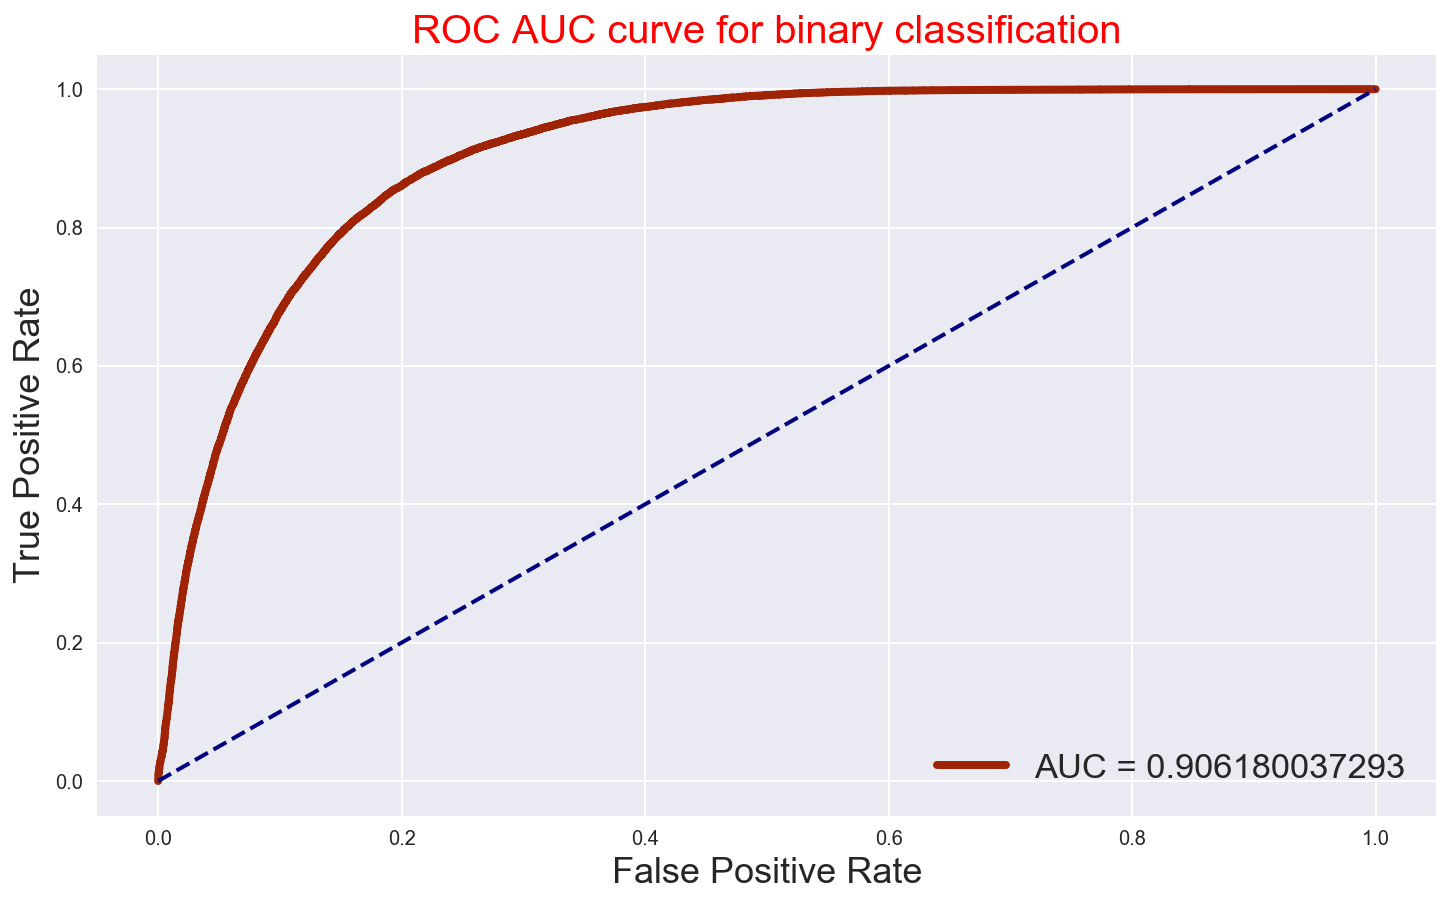

In [37]:
fig, ax = plt.subplots(figsize=(12,7))
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytst,  y_pred_proba)
auc = metrics.roc_auc_score(ytst, y_pred_proba)
plt.plot(fpr, tpr, label="AUC = "+str(auc), linewidth=4, color='#9f2305')
plt.title('ROC AUC curve for binary classification', size = 20, color='r')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.legend(loc=4, fontsize = 'xx-large')
plt.show()

# <span style="color:#7f7053">- Features Importance.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">Negative coefficients mean that one, on average, moves the prediction closer to being a negative example in my case 0. Positive coefficients move on closer to being classified as a positive example, on average in my case 1. I use lr.coef_.flatten(), to put my coefficient in to the list 1 dimensional from array. I can show my 10 best predictors for for my Logistic Regression model as absolute values of my coefficient - Abs Coef.

In [38]:
# Create dataframe to look at coefficients of each feature.
# ________________________________________________________
logreg_coefs = pd.DataFrame({'Feature':features.columns,
                             'Coef':lr.coef_.flatten(),
                             'Abs_coef':np.abs(lr.coef_.flatten())})

logreg_coefs.sort_values('Abs_coef', inplace=True, ascending=False)
logreg_coefs.head(10)

,Abs_coef,Coef,Feature
34,2.039100,-2.039100,origin_airport_group_9
35,2.031627,-2.031627,origin_airport_group_10
24,2.029108,-2.029108,flight_number_group_3
23,1.255421,-1.255421,flight_number_group_2
49,1.188013,1.188013,state_orig_IL
44,1.011099,1.011099,state_orig_GA
25,1.010753,-1.010753,flight_number_group_4
79,0.879287,0.879287,state_orig_TX
32,0.762765,-0.762765,origin_airport_group_7
33,0.654532,-0.654532,origin_airport_group_8


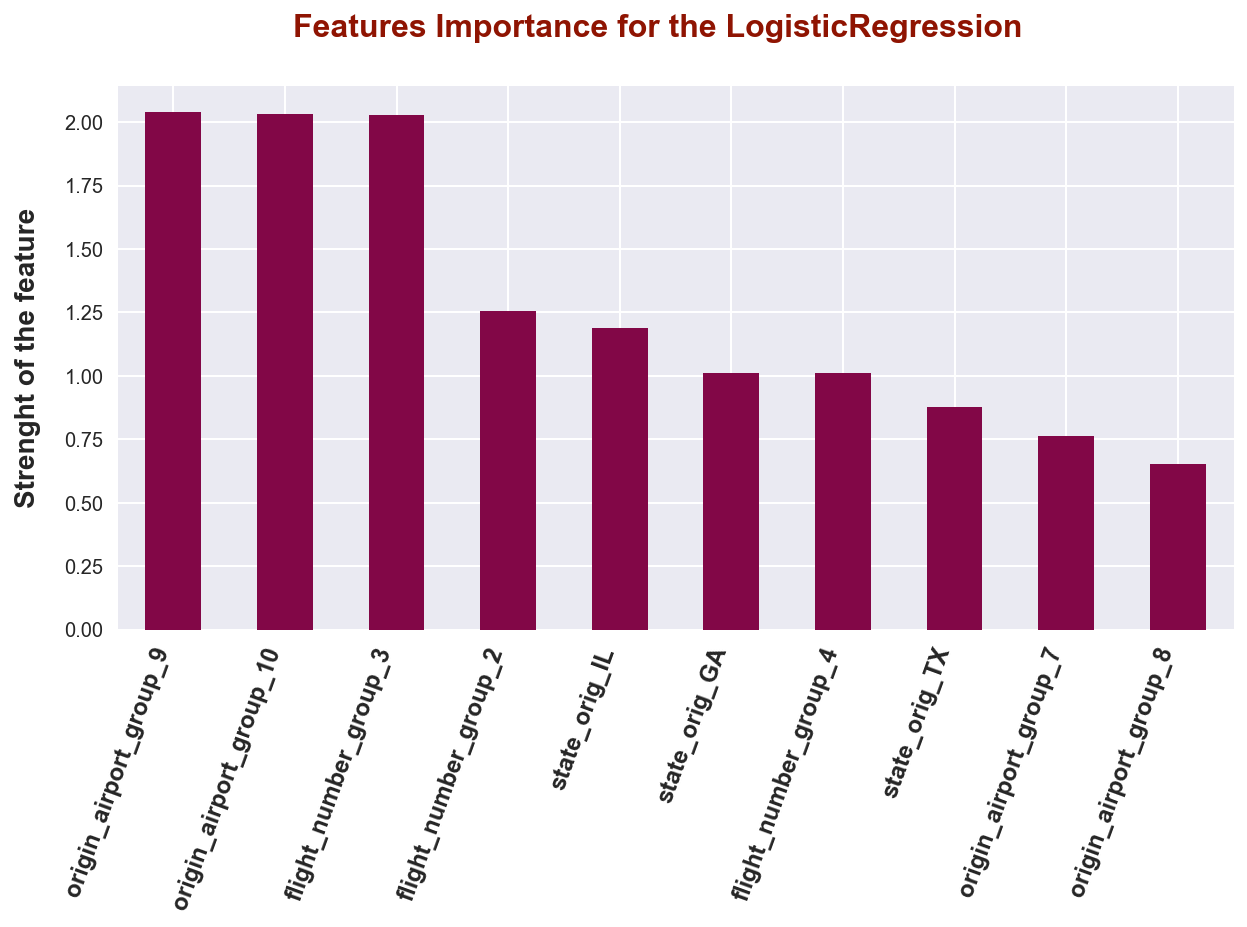

In [50]:
ax = logreg_coefs[['Abs_coef', 'Feature']].head(10).plot(kind='bar', figsize = (10,5), color=['#820747'])
ax.set_xticklabels(logreg_coefs.Feature.head(10))
plt.ylabel('Strenght of the feature', fontsize=14, weight = 'bold', labelpad=12)
plt.setp(ax.get_xticklabels(), fontsize=12, ha = 'right', rotation = 70, weight = 'bold')
plt.suptitle('Features Importance for the LogisticRegression', size=16, color='#8f1402', weight = 'bold')
ax.legend().set_visible(False)

plt.show()

<img src="img/lin.jpg">

# <span style="color:#ffad01">5. Model: <span style="color:#004577">DecisionTreeClassifier.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">A tree structure is constructed that breaks the dataset down into smaller subsets eventually resulting in a prediction. There are decision nodes that partition the data and leaf nodes that give the prediction that can be followed by traversing simple IF..AND..AND….THEN logic down the nodes. First stage for the modeling will be finding better hyperparameters for my model. Also I will show how strong my model using confusion matrix. And I will show tree visually.

# <span style="color:#7f7053">- GridSearch for DecisionTreeClassifier.

In [215]:
%%time
dtc_params = {
    'max_depth':[60, 35, 45],
    'max_features':[None],
    'min_samples_split':[2,3,4]
}
dtc_gs = GridSearchCV(DecisionTreeClassifier(), dtc_params, cv=2, verbose=1)

dtc_gs.fit(X_train, yt.ravel())
print(dtc_gs.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 14.9min finished


{'max_depth': 60, 'max_features': None, 'min_samples_split': 3}
CPU times: user 16min 28s, sys: 24.4 s, total: 16min 52s
Wall time: 16min 53s


# <span style="color:#7f7053">- Fit Best Parameters into my Model.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">After enumeration of parameters I found optimal ones for my DecisionTreeClassifier: <b>{'max_depth': 60, 'max_features': None, 'min_samples_split': 3}</b>. I used cross validation with 4 folds to check mean score. I can see my prediction looks almost the same in each fold which is good. Then I fit my data into my model, and got very high result <b>0.9664 for the Train part</b>, and <b>0.9349 for the Test part</b>.

In [218]:
dtr_scores = cross_val_score(DecisionTreeClassifier(max_depth=60, max_features=None, min_samples_split=3), X_train, yt.ravel(), cv=4)

In [220]:
# Print my values which I got with cross validation and mean for them.
# ________________________________________________________
print (dtr_scores, np.mean(dtr_scores))

[ 0.93251367  0.93196186  0.93310422  0.93320941] 0.932697290331


In [221]:
%%time
# Fit my DecisionTreeClassifier model.
# ________________________________________________________
tree = DecisionTreeClassifier(max_depth=60, max_features=None, min_samples_split=3)
tree.fit(X_train, yt.ravel())

CPU times: user 2min 4s, sys: 673 ms, total: 2min 5s
Wall time: 2min 5s


In [222]:
print('--------------------------------')
print("My Train Score: ", tree.score(X_train, y_train))
print('--------------------------------')
print("My Test Score: ", tree.score(X_test, ytst))
print('--------------------------------')

--------------------------------
My Train Score:  0.966498700318
--------------------------------
My Test Score:  0.934980069267
--------------------------------


# <span style="color:#7f7053">- Confusion Matrix and Classification Report for DT Model.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">For DecisionTreeClassifier confusion matrix is <b>89301 true positive</b> values and <b>39471 true negative</b>. Errors this time is really small, <b>5355 false negative</b> and <b>3600 false positive</b>. Precision, recall, F1 and accuracy 0.93.

In [223]:
y_probs1 = tree.predict(X_test)
print(pd.DataFrame(confusion_matrix(ytst, y_probs1)))
print('     '+'TN'+'    '+'FP')                                          
print('     '+'FN'+'    '+'TP')                                          
print('')
# Printing classification report
report_svm = precision_recall_fscore_support(list(ytst), list(y_probs1), average='micro')
print ("\nprecision = %0.2f, recall = %0.2f, F1 = %0.2f, accuracy = %0.2f\n" % \
        (report_svm[0], report_svm[1], report_svm[2], accuracy_score(list(ytst), list(y_probs1))))

       0      1
0  89301   3600
1   5355  39471
     TN    FP
     FN    TP


precision = 0.93, recall = 0.93, F1 = 0.93, accuracy = 0.93



# <span style="color:#7f7053">- ROC AUC Curve For DecisionTreeClassifier.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">The Area Under Curve score for the DecisionTreeClassifier is 0.95, which is bigger than from LogisticRegression. I plot two Curved Lines from two different model to show how difference looks like.

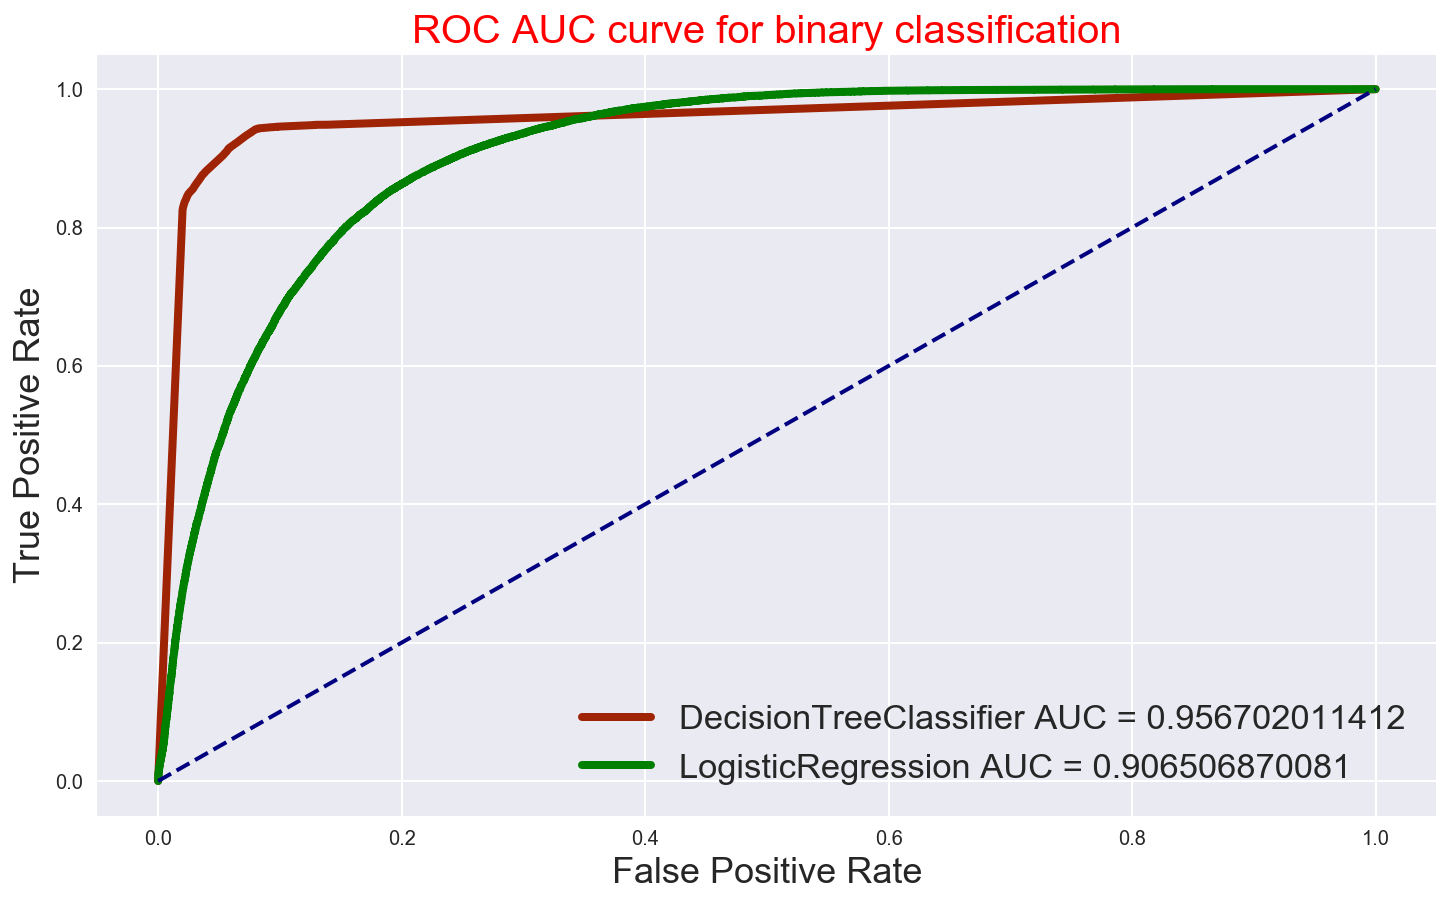

In [265]:
fig, ax = plt.subplots(figsize=(12,7))
y_pred_proba1 = tree.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(ytst,  y_pred_proba1)
auc1 = metrics.roc_auc_score(ytst, y_pred_proba1)
plt.plot(fpr1, tpr1, label="DecisionTreeClassifier AUC = "+str(auc1), linewidth=4, color='#9f2305')
plt.plot(fpr, tpr, label="LogisticRegression AUC = "+str(auc), linewidth=4, color='green')
plt.title('ROC AUC curve for binary classification', size = 20, color='r')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.legend(loc=4, fontsize = 'xx-large')
plt.show()

# <span style="color:#7f7053">- Features Importance for DT model.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">Most 10 important features I show in this table. We can see that features from the groups which representing flight number, states, origin airport are more important for this model as a predictors.

In [290]:
# Check what fitures more important for my model. 
# ________________________________________________________
fi = pd.DataFrame({
        'feature':features.columns,
        'importance':tree.feature_importances_
    })
fi.sort_values('importance', ascending=False, inplace=True)
fi.head(10)

,feature,importance
25,flight_nimber_group_3,0.133726
24,flight_nimber_group_2,0.100214
80,state_orig_TX,0.054907
36,origin_airport_group_10,0.043834
34,origin_airport_group_8,0.040692
50,state_orig_IL,0.035140
35,origin_airport_group_9,0.034421
32,origin_airport_group_6,0.028212
28,origin_airport_group_2,0.024963
44,state_orig_FL,0.024426


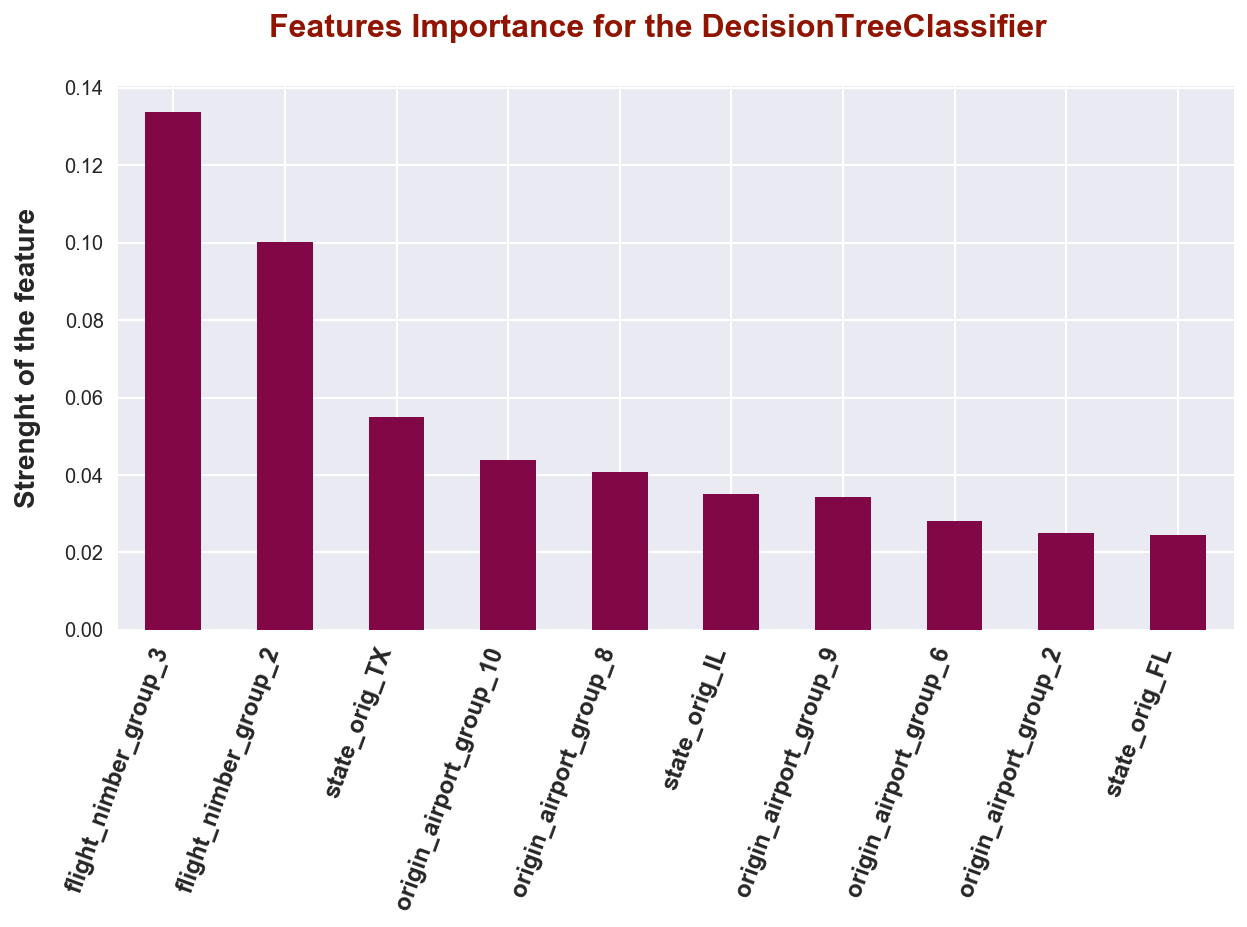

In [297]:
ax = fi.head(10).plot(kind='bar', figsize = (10,5), color=['#820747'])
ax.set_xticklabels(fi.feature)
plt.ylabel('Strenght of the feature', fontsize=14, weight = 'bold', labelpad=12)
plt.setp(ax.get_xticklabels(), fontsize=12, ha = 'right', rotation = 70, weight = 'bold')
plt.suptitle('Features Importance for the DecisionTreeClassifier', size=16, color='#8f1402', weight = 'bold')
ax.legend().set_visible(False)

plt.show()

# <span style="color:#7f7053">- Tree Visualisation for DT model.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">As I have depth of my tree 60 I will limited in this diagram my depth to 3. As we can see gray blocks are represented continue of this tree diagram. Features in orange blocks are more important than blue. 

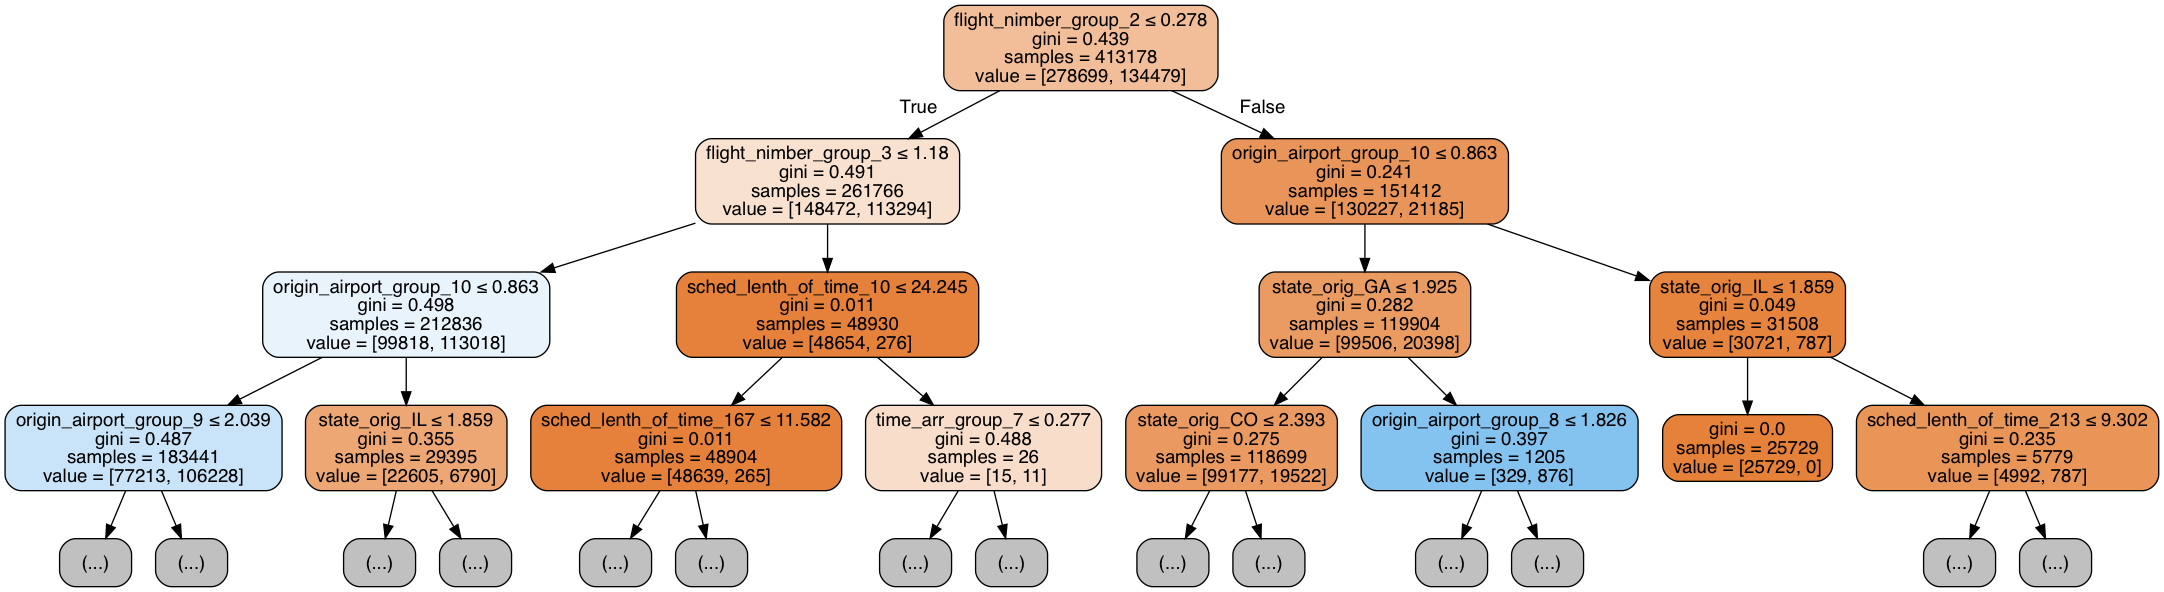

In [246]:
# initialize the output file object
# ________________________________________________________
dot_data = StringIO() 

export_graphviz(tree, out_file=dot_data, max_depth=3, filled=True, rounded=True,
                special_characters=True, feature_names=features.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

<img src="img/lin.jpg">

# <span style="color:#ffad01">6. Model: <span style="color:#004577">RandomForestClassifier.

<img src="img/forest.jpg">

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">Random Forest Classifier is ensemble algorithm. Ensembled algorithms are those which combines more than one algorithms of same or different kind for classifying objects. And then taking vote for final consideration of class for test object. As usual I will follow step by step in building my model and I will give some reports.

# <span style="color:#7f7053">- GridSearch for RandomForestClassifier.

In [249]:
%%time
params = {'criterion':['gini'],
          'n_estimators':[41, 51, 61],
          'min_samples_leaf':[1,2],
          'min_samples_split':[2, 3], 
          'random_state':[123]}
#Making models with hyper parameters sets
Rforest_gs = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=2, verbose=1)
Rforest_gs.fit(X_train, yt.ravel())
print(Rforest_gs.best_params_)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 41.5min finished


{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 61, 'random_state': 123}
CPU times: user 45min 14s, sys: 43.5 s, total: 45min 58s
Wall time: 46min 1s


# <span style="color:#7f7053">- Fit Best Parameters into my RF Model.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">Best parameters for my RandomForestClassifier: <b>{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 61, 'random_state': 123}</b>. Check my scores with cross validation. And after that I fit my data into my model, and got result <b>0.9768 for the Train part</b>, and <b>0.9386 for the Test part</b>.

In [252]:
forest_cros = cross_val_score(RandomForestClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=3, n_estimators=61, random_state=123), X_train, yt.ravel(), cv=4)

In [253]:
# Print my values which I got with cross validation and mean for them.
# ________________________________________________________
print (forest_cros, np.mean(dtr_scores))

[ 0.93684109  0.93672491  0.93690885  0.93781766] 0.932697290331


In [51]:
%%time
# Fit my DecisionTreeClassifier model.
# ________________________________________________________
forest = RandomForestClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=3, n_estimators=61, random_state=123)
forest.fit(X_train, yt.ravel())

CPU times: user 5min 1s, sys: 2.08 s, total: 5min 3s
Wall time: 5min 4s


In [52]:
print('--------------------------------')
print("My Train Score: ", forest.score(X_train, y_train))
print('--------------------------------')
print("My Test Score: ", forest.score(X_test, ytst))
print('--------------------------------')

--------------------------------
My Train Score:  0.976850171113
--------------------------------
My Test Score:  0.93920582021
--------------------------------


# <span style="color:#7f7053">- Confusion Matrix and Classification Report for RF Model.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">Confusion Matrix for the RandomForestClassifier is <b>88897 true positive</b> values and <b> 40375 true negative</b>. This time we do less errors on <b>false negative 4451</b> and for the false positive we have <b> 4004</b>.

In [256]:
y_probs1 = forest.predict(X_test)
print(pd.DataFrame(confusion_matrix(ytst, y_probs1)))
print('     '+'TN'+'    '+'FP')                                          
print('     '+'FN'+'    '+'TP')                                          
print('')
# Printing classification report
report_svm = precision_recall_fscore_support(list(ytst), list(y_probs1), average='micro')
print ("\nprecision = %0.2f, recall = %0.2f, F1 = %0.2f, accuracy = %0.2f\n" % \
        (report_svm[0], report_svm[1], report_svm[2], accuracy_score(list(ytst), list(y_probs1))))

       0      1
0  88897   4004
1   4451  40375
     TN    FP
     FN    TP


precision = 0.94, recall = 0.94, F1 = 0.94, accuracy = 0.94



# <span style="color:#7f7053">- ROC AUC Curve For RandomForestClassifier.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">The Area Under Curve score for the RandomForestClassifier is <b>0.98</b>, which is bigger than from LogisticRegression and RandomForest. I plot two Curved Lines from tree different models to show how difference looks like.

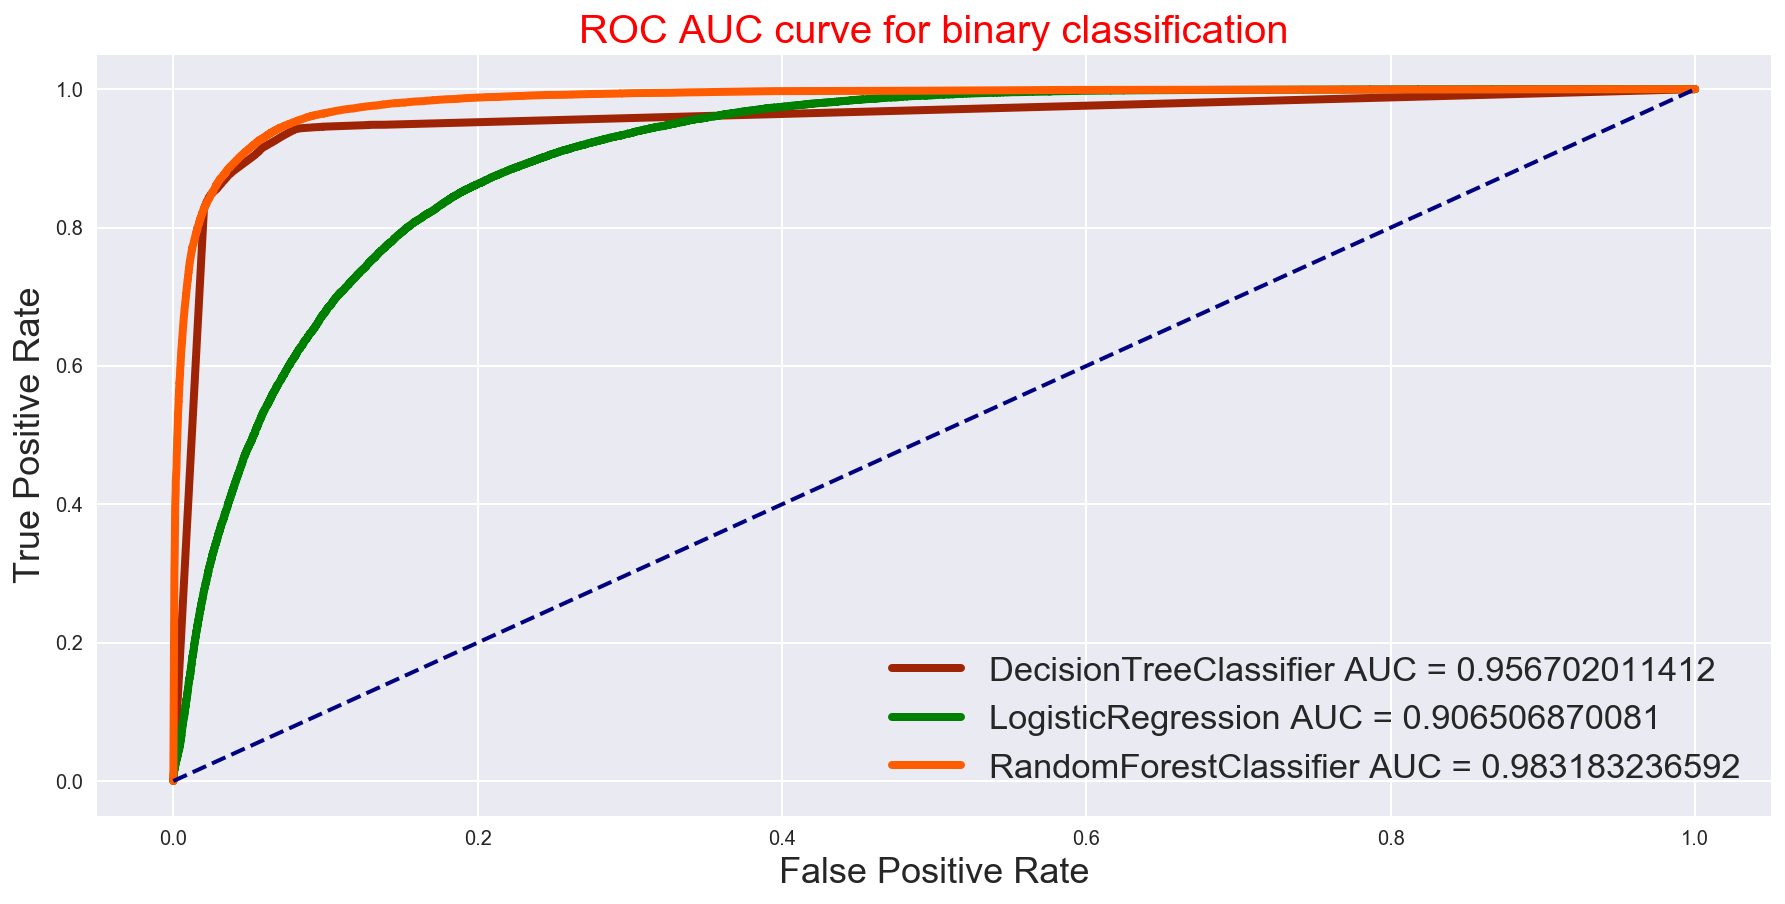

In [266]:
fig, ax = plt.subplots(figsize=(15,7))
y_pred_proba2 = forest.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(ytst,  y_pred_proba2)
auc2 = metrics.roc_auc_score(ytst, y_pred_proba2)

plt.plot(fpr1, tpr1, label="DecisionTreeClassifier AUC = "+str(auc1), linewidth=4, color='#9f2305')
plt.plot(fpr, tpr, label="LogisticRegression AUC = "+str(auc), linewidth=4, color='green')
plt.plot(fpr2, tpr2, label="RandomForestClassifier AUC = "+str(auc2), linewidth=4, color='#ff5b00')

plt.title('ROC AUC curve for binary classification', size = 20, color='r')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.legend(loc=4, fontsize = 'xx-large')
plt.show()

# <span style="color:#7f7053">- Features Importance for RF model.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">Most 10 important features I show in this table. We can see that features from the groups
which representing flight number, states, origin airport are more important for this model same as fore the DesisionTree. 

In [288]:
# Check what fitures more important for my model. 
# ________________________________________________________
fi2 = pd.DataFrame({
        'feature':features.columns,
        'importance':forest.feature_importances_
    })
fi2.sort_values('importance', ascending=False, inplace=True)
fi2.head(10)

,feature,importance
24,flight_nimber_group_2,0.098309
25,flight_nimber_group_3,0.067826
36,origin_airport_group_10,0.047549
28,origin_airport_group_2,0.024484
35,origin_airport_group_9,0.024383
29,origin_airport_group_3,0.023352
30,origin_airport_group_4,0.022100
33,origin_airport_group_7,0.020746
80,state_orig_TX,0.019273
34,origin_airport_group_8,0.018073


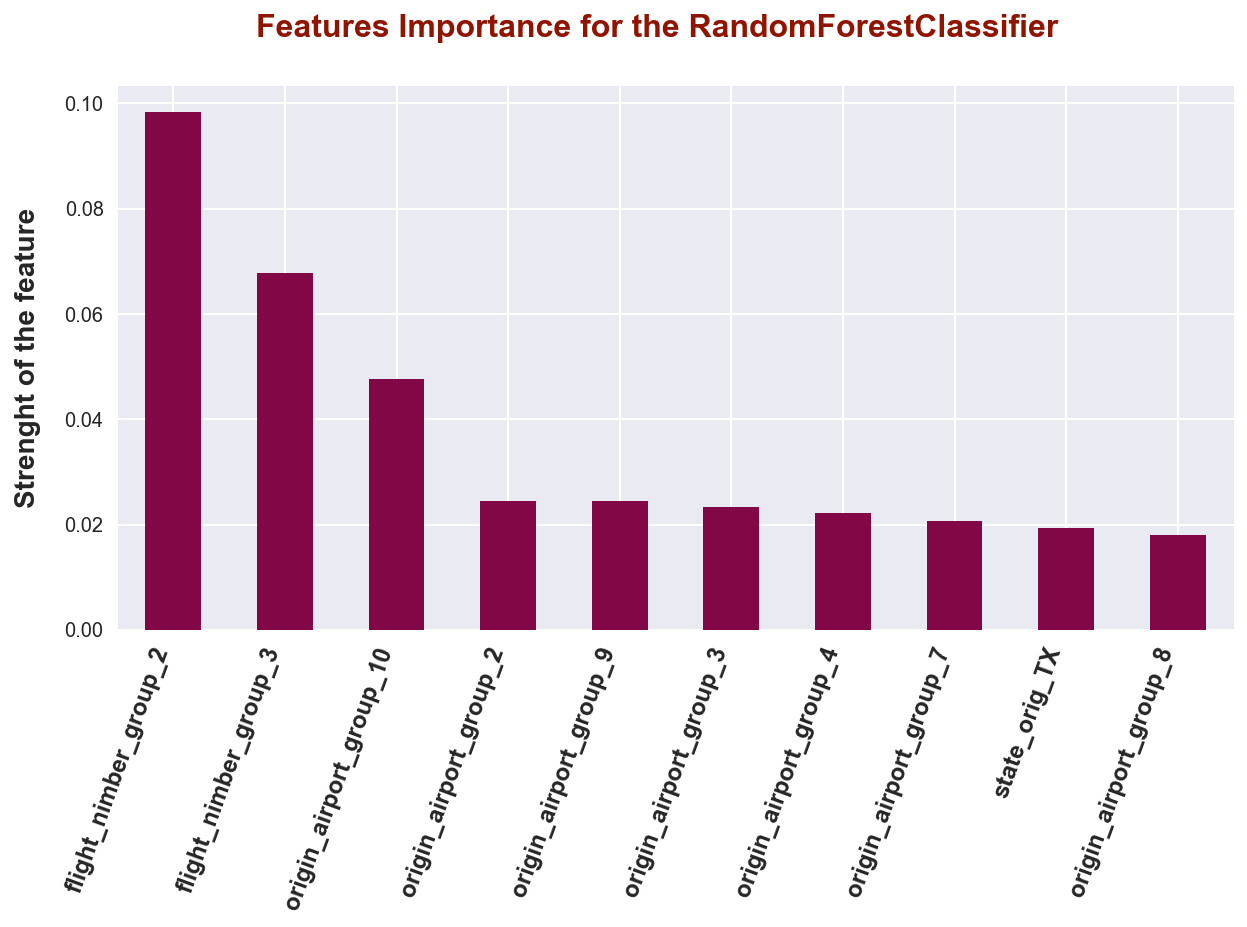

In [289]:
ax = fi2.head(10).plot(kind='bar', figsize = (10,5), color=['#820747'])
ax.set_xticklabels(fi.feature)
plt.ylabel('Strenght of the feature', fontsize=14, weight = 'bold', labelpad=12)
plt.setp(ax.get_xticklabels(), fontsize=12, ha = 'right', rotation = 70, weight = 'bold')
plt.suptitle('Features Importance for the RandomForestClassifier', size=16, color='#8f1402', weight = 'bold')
ax.legend().set_visible(False)

plt.show()

<img src="img/lin.jpg">

# <span style="color:#ffad01">7. Model: <span style="color:#004577">Sapport Vector Machine and k-Nearest Neighbor.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f"><b>KNN</b> and <b>SVM</b> models are very slow with high dimensional data. I was trying with few different parameters but my computer crashed.

<img src="img/slow.jpg">

<img src="img/lin.jpg">

# <span style="color:#ffad01">8. PCA: <span style="color:#004577">Dimension reductions (Principal Component Analysis).

<img src="img/pca.png">

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">Principal Component Analysis is a dimension-reduction tool that can be used to reduce my large set of variables to a smaller set that still contains most of the information in the large set. PCA as an example where standardization is crucial, since it is “analyzing” the variances of the different features. I reduced my 600 dimension to 400 in this case, but when I use logistic regression I got score much lower than without reduction <b>0.6961</b>. I think it is because, I'm losing some important information in my dataset, kind of relationship between my variables.

In [314]:
%%time
# Fit my variables into PCA with 400 n_components which represents number of dimensions after transformation.
# ________________________________________________________
subjective_pca = PCA(n_components=400)
subjective_pca.fit(featuresS)

CPU times: user 4min 53s, sys: 31.2 s, total: 5min 25s
Wall time: 2min 22s


In [315]:
subj_components = subjective_pca.components_

In [316]:
%%time
subj_to_pcs = subjective_pca.transform(featuresS)

CPU times: user 12.9 s, sys: 3.61 s, total: 16.5 s
Wall time: 8.13 s


In [317]:
# Look at new values wich I got after PCA
# ________________________________________________________
subj_to_pcs[:,:3]

array([[-0.61402196,  1.73616555,  0.50767081],
       [-0.78754011,  1.08210909,  0.51801365],
       [ 0.92329566, -0.93788801, -3.49525375],
       ..., 
       [ 6.32102413, -0.22287876, -2.191685  ],
       [ 6.35998299, -0.27664038, -2.24102898],
       [ 6.23272546, -0.43709059, -2.12061875]])

In [318]:
# Using train test split, I split my data into train and test parts.
# -----------------------------------------------------
X_train5, X_test5, y_train5, y_test5 = train_test_split(subj_to_pcs, target, test_size=0.25, stratify=target, random_state=21)

# <span style="color:#7f7053">- Fit LogisticRegression with my new dimensionality.

In [319]:
%%time
# Fit my LogisticRegression model.
# -----------------------------------------------------
lr5 = LogisticRegression(penalty='l2', C=0.07, solver='liblinear')
lr5.fit(X_train5, y_train5.values)

/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 23.4 s, sys: 1.28 s, total: 24.7 s
Wall time: 24.7 s


In [324]:
print('--------------------------------')
print("My Train Score: ", lr5.score(X_train5, y_train5))
print('--------------------------------')
print("My Test Score: ", lr5.score(X_test5, y_test5))
print('--------------------------------')

--------------------------------
My Train Score:  0.69913209319
--------------------------------
My Test Score:  0.696130751414
--------------------------------


# <span style="color:#7f7053">- Confusion Matrix for LR Model with new dimensionality.

In [325]:
y_probs5 = lr5.predict(X_test5)
print(pd.DataFrame(confusion_matrix(y_test5, y_probs5)))
print('     '+'TN'+'    '+'FP')                                          
print('     '+'FN'+'    '+'TP')                                          
print('')
# Printing classification report
report_svm = precision_recall_fscore_support(list(ytst), list(y_probs5), average='micro')
print ("\nprecision = %0.2f, recall = %0.2f, F1 = %0.2f, accuracy = %0.2f\n" % \
        (report_svm[0], report_svm[1], report_svm[2], accuracy_score(list(ytst), list(y_probs5))))

       0      1
0  83739   9162
1  32689  12137
     TN    FP
     FN    TP


precision = 0.70, recall = 0.70, F1 = 0.70, accuracy = 0.70



<img src="img/lin.jpg">

<img src="img/conc.jpg">

<span style="color:#610023">In this part I built 3 working models such as LogisticRegression, DessisionTreeClasifire, RandomForestClasifire. All of the gave me good result, but leader between all of them is my RandomForest, confusion matrix looks very good with this model. I do less mistakes on predicting false negative value, which is good because I'm predicting less number of times that delays not gonna happen but it will. Also I do not do many mistakes with predicting delays when they are not going to happen. <b>ROC AUC</b> for the RandomForestClassifire score is: <b>0.9831</b>. I found most important features for my models which was in a top list in all my models:

<b>flight_number_group_3</b> <span style="color:#610023">(group of flight numbers which was recorded with delays in range 120 - 180)</span><br>
<b>flight_number_group_2</b><span style="color:#610023"> (group of flight numbers which was recorded with delays in range 60 - 180)</span><br>
<b>origin_airport_group_10</b><span style="color:#610023"> (group of origin airports numbers which was recorded with delays more than 10000)</span><br>
<b>origin_airport_group_9</b><span style="color:#610023"> (group of origin airports numbers which was recorded with delays in range 9000 - 10000)</span><br>
<b>state_orig_TX</b> <span style="color:#610023">(Origin state Texas)</span><br>
<b>origin_airport_group_8</b> <span style="color:#610023">(group of origin airports numbers which was recorded with delays in range 8000 - 9000)</span><br>

<span style="color:#610023">SVM and KNN - are not a good choice for high dimension datasets.

<span style="color:#610023">I did dimention reductions with unsupervise technique PCA, and reduce dimention to 400 from 600, but got low score for my LogisticRegression, because I loosing some logical relationship in my data after aplying PCA. 

[GO NEXT >>](./Chapter-3-regression_problem.ipynb)

[GO BACK <<](./Chapter-1-EDA.ipynb)  